# Задание №1 Линейная регрессия + градиентный спуск

In [4]:
import numpy as np
import pandas as pd
from typing import Optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate: float = 0.01, iterations: int = 1000) -> None:
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights: Optional[np.ndarray] = None
        self.bias: float = 0.0
        self.losses: list = []
        self._scaler = StandardScaler()


    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        if X.size == 0 or y.size == 0:
            raise ValueError("X и y не могут быть пустыми.")
        
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество samples в X и y должно совпадать.")
        
        X_normalized = self._scaler.fit_transform(X)
        
        n_features = X_normalized.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.losses = []

        for _ in range(self.iterations):
            self._update_weights(X_normalized, y)
            self.losses.append(self._compute_mse(X_normalized, y))
        
        return self


    def _update_weights(self, X: np.ndarray, y: np.ndarray) -> None:
        y_pred = np.dot(X, self.weights) + self.bias
        error = y_pred - y
        n_samples = X.shape[0]

        dw = (2 / n_samples) * np.dot(X.T, error)
        db = (2 / n_samples) * np.sum(error)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db


    def _compute_mse(self, X: np.ndarray, y: np.ndarray) -> float:
        y_pred = np.dot(X, self.weights) + self.bias
        return np.mean((y_pred - y) ** 2)

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.weights is None:
            raise ValueError("Модель не обучена.")
        
        if X.size == 0:
            raise ValueError("X не может быть пустым.")

        X_normalized = self._scaler.transform(X)
        
        return np.dot(X_normalized, self.weights) + self.bias

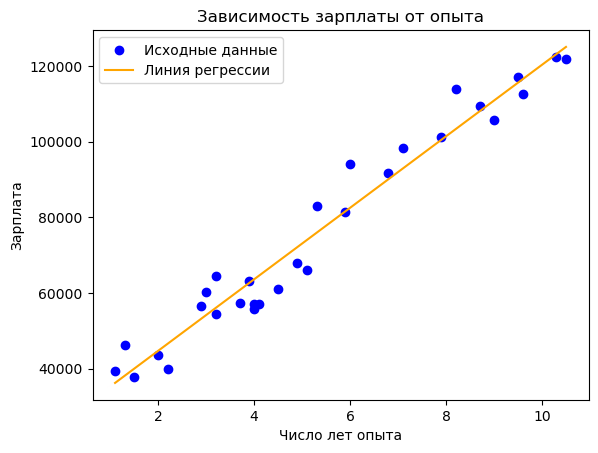

In [6]:
df = pd.read_csv('https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@salary_data_.csv')

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()